In [2]:
import keras
from keras.datasets import mnist as db
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from matplotlib import pyplot as plt 

%matplotlib inline

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [3]:
(x, y), (x_test_ori, y_test_ori) = db.load_data()

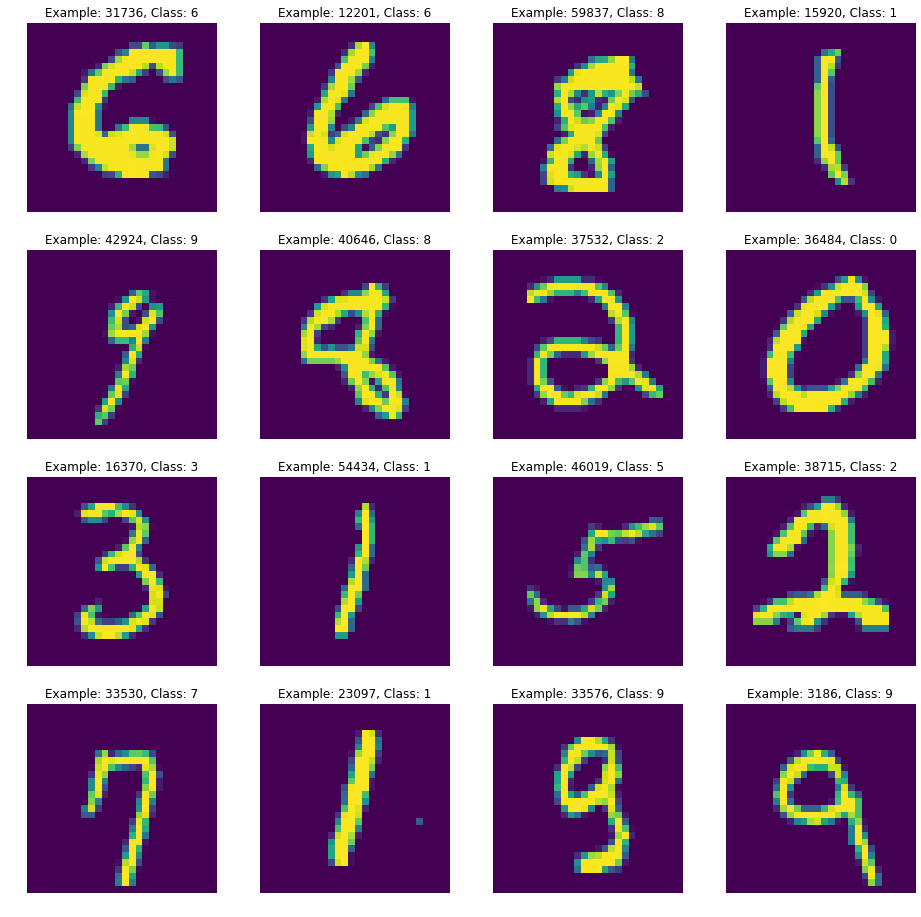

In [4]:
# Visualize a single digit, with its class
plt_r,plt_c = 4,4
f, ax = plt.subplots(plt_r,plt_c, figsize=(16,16))
for i in range(plt_r):
    for j in range(plt_c):
        index = np.random.randint(x.shape[0])
        ax[i][j].imshow(x[index])
        ax[i][j].axis('off')
        ax[i][j].set_title("Example: {}, Class: {}".format(index, y[index]))
plt.show()

In [5]:
# Data management
val_nb = 5000  # number of validation samples
nb_samples = x.shape[0]

if val_nb > nb_samples:
    raise ValueError("You need some samples to train your network!")

x = x.reshape(nb_samples, 784)
x_test = x_test_ori.reshape(x_test_ori.shape[0], 784)
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test_ori.shape, 'y test samples')

# convert class vectors to binary class matrices
num_classes = max(y) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test_ori, num_classes)

(55000, 784) x train samples
(5000, 784) x val samples
(10000, 784) x test samples
(55000,) y train samples
(5000,) y val samples
(10000,) y test samples


# Model definition

The following model uses keras to build a fully convolutional network. It has to respect some constraints:

- The input shape has to match the size of each input sample. 
- The ouptput should be of size 10 (num_classes)

Other than that, you change the number of layers as well as the size of each of them.

In [6]:
## Simple model without hidden variables
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(x_train.shape[1],)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Model training

The following section takes care of training.

Firstly, the model has to be 'compiled'. This operations lets the user choose the loss, the optimizer and the metrics, then configures the model for training.

Secondly, the 'fit' method runs the optmization. Training and validation data are specified here, as well as batch size and the number of epochs.

In [7]:
from keras.optimizers import SGD
batch_size = 128
epochs = 20
learning_rate = 0.1
# muli
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 42us/step - loss: 0.6020 - acc: 0.8478 - val_loss: 0.3924 - val_acc: 0.8972
Epoch 2/20
55000/55000 [==============================] - 1s 11us/step - loss: 0.3845 - acc: 0.8954 - val_loss: 0.3412 - val_acc: 0.9084
Epoch 3/20
55000/55000 [==============================] - 1s 11us/step - loss: 0.3502 - acc: 0.9027 - val_loss: 0.3209 - val_acc: 0.9104
Epoch 4/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.3327 - acc: 0.9069 - val_loss: 0.3070 - val_acc: 0.9174
Epoch 5/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.3213 - acc: 0.9100 - val_loss: 0.2985 - val_acc: 0.9178
Epoch 6/20
55000/55000 [==============================] - 1s 11us/step - loss: 0.3131 - acc: 0.9132 - val_loss: 0.2928 - val_acc: 0.9190
Epoch 7/20
55000/55000 [==============================] - 1s 12us/step - loss: 0.3068 - acc: 0.9147 - val_loss: 0.2883 - val_acc:

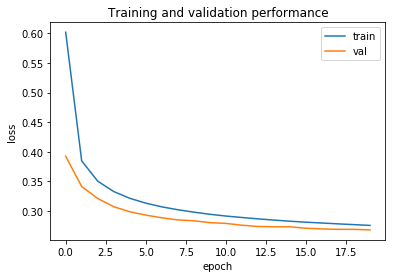

In [8]:
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# plt.ylim(0.2, 0.8)

(784, 10)
(10,)
0.017592927
0.08516166
-0.0462774
-0.033692047
-0.06894357
0.04780214
-0.069646925
0.030131135
0.07256993
0.021702304


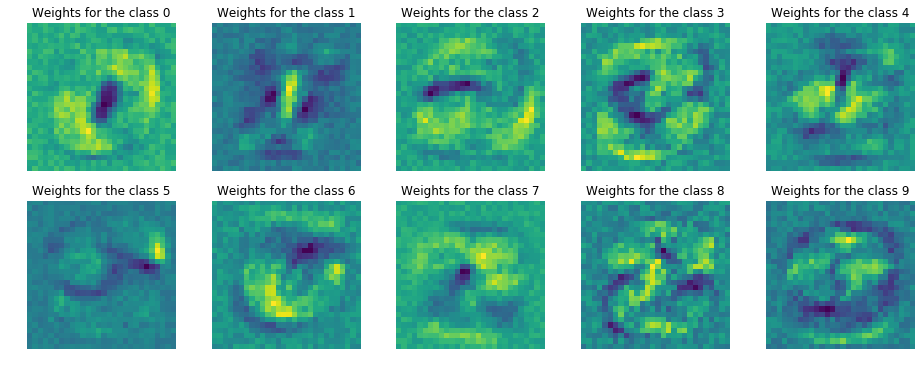

In [11]:
# plotting the weights in the 
W, b = model.layers[0].get_weights()
print(W.shape)
print(b.shape)
f, ax = plt.subplots(2, 5, figsize=(16,6))
for plt_row in range(2):
    for plt_col in range(5):
        ax[plt_row][plt_col].imshow(W[:,plt_row*5 + plt_col].reshape(28,28))
        ax[plt_row][plt_col].axis('off')
        ax[plt_row][plt_col].set_title("Weights for the class {}".format(plt_row*5 + plt_col))
        print(W[392, plt_row*5 + plt_col])

plt.show()